# Ch2 Lecture 3

# *Difference Equations*

## *Difference Equations*

# *Example: Digital Filters*

## *Digital Filters*

Another use for difference equations:

$$
\begin{equation*}
y_{k}=a_{0} x_{k}+a_{1} x_{k-1}+\cdots+a_{m} x_{k-m}, \quad k=m, m+1, m+2, \ldots, 
\end{equation*}
$$

. . .

$x$ is a continuous variable – perhaps sound in time domain, or parts of
an image in space.

$y$ is some filtered version of $x$.

## *Example: Cleaning up a noisy signal*

True signal: $f(t)=\cos (\pi t),-1 \leq t \leq 1$

Signal plus noise: $g(t)=\cos (\pi t)+$
$\frac{1}{5} \sin (24 \pi t)+\frac{1}{4} \cos (30 \pi t)$

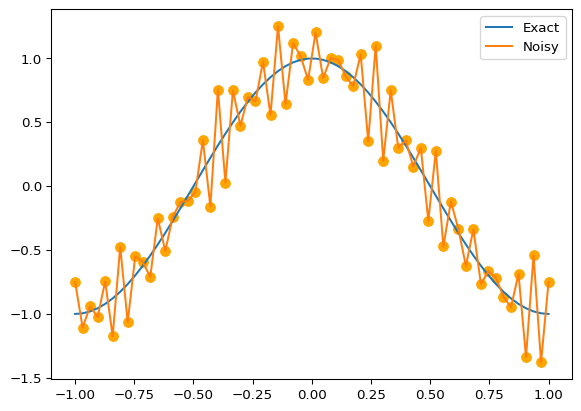

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(start=-1,stop=1,num=64)
def f(x):
    return np.cos(np.pi*x)
def g(x):
    return np.cos(np.pi*x) + 1/5*np.sin(24*np.pi*x) + 1/4*np.cos(30*np.pi*x)

plt.plot(x, f(x), label='Exact')
plt.plot(x, g(x), label='Noisy')
plt.scatter(x, g(x), color='orange', s=50)  # Add dots for 'Noisy'
plt.legend()

## *Filtered data*

Idea: we can sample nearby points and take a weighted average of them.

$$
y_{k}=\frac{1}{4} x_{k+1}+\frac{1}{2} x_{k}+\frac{1}{4} x_{k-1}, \quad k=1,2, \ldots, 63
$$

. . .

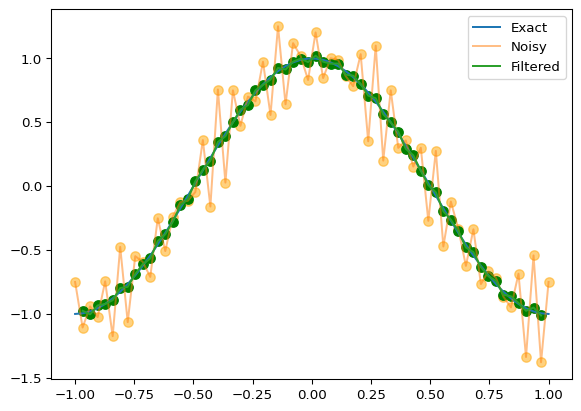

In [3]:
y = np.zeros_like(x)
for k in range(1, 63):
    y[k] = 1/4*g(x[k+1]) + 1/2*g(x[k]) + 1/4*g(x[k-1])
plt.plot(x, f(x), label='Exact')
plt.plot(x, g(x), label='Noisy', alpha=0.5)
plt.scatter(x, g(x), color='orange', s=50, alpha=0.5)  # Add dots for 'Noisy'
plt.plot(x[1:-1], y[1:-1], label='Filtered')
plt.scatter(x[1:-1], y[1:-1], color='green', s=50)  # Add dots for 'Filtered'
plt.legend()

. . .

This captured the low-frequency part of the signal, and filtered out the
high-frequency noise. That’s just what we wanted! This is called a
*low-pass filter*.

## 

We can zoom in on a few points to see the effect of the filter.

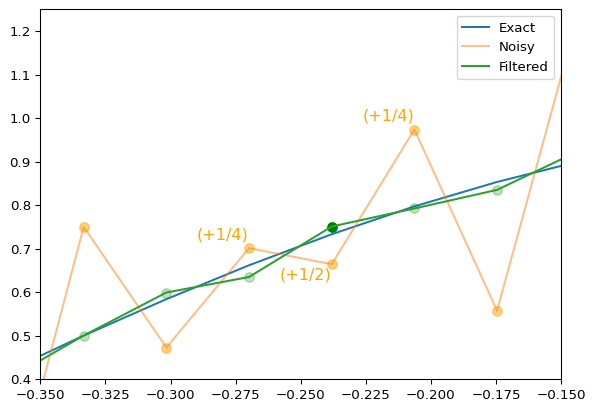

In [4]:
plt.plot(x, f(x), label='Exact')
plt.plot(x, g(x), label='Noisy', alpha=0.5)
plt.scatter(x, g(x), color='orange', s=50, alpha=0.5)  # Add dots for 'Noisy'
plt.plot(x, y, label='Filtered')
for i in range(len(x)):
  if i == 24:
    plt.scatter(x[i], y[i], color='green', s=50, alpha=1)  # Add dot for y[24] with 100% opacity
  else:
    plt.scatter(x[i], y[i], color='green', s=50, alpha=0.25)  # Add other dots for 'Filtered' with 25% opacity
plt.text(x[25]-.02, g(x[25])+.02, '(+1/4)', color='orange', fontsize=12)  # Add label to the orange dot at 24
plt.text(x[24]-.02, g(x[24])-.035, '(+1/2)', color='orange', fontsize=12)  # Add label to the orange dot at 24
plt.text(x[23]-.02, g(x[23])+.02, '(+1/4)', color='orange', fontsize=12)  # Add label to the orange dot at 24
 

plt.xlim(-0.35, -.15)
# make the ylim automatically adjust to the data in the zoomed in region
plt.ylim(bottom=0.4, top=1.25)
plt.legend()

## *Now you try*

See if you can make a figure which will just find the noisyness…

``` {pyodide-python}
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(start=-1,stop=1,num=64)
def f(x):
    return np.cos(np.pi*x)
def g(x):
    return np.cos(np.pi*x) + 1/5*np.sin(24*np.pi*x) + 1/4*np.cos(30*np.pi*x)
y = np.zeros_like(x)
for k in range(1, 63):
    y[k] = 1/4*g(x[k+1]) + 1/2*g(x[k]) + 1/4*g(x[k-1])
fig = plt.figure()
plt.clf()
plt.plot(x, f(x), label='Exact')
plt.plot(x, g(x), label='Noisy', alpha=0.5)
plt.scatter(x, g(x), color='orange', s=50, alpha=0.5)  # Add dots for 'Noisy'
plt.plot(x[1:-1], y[1:-1], label='Filtered')
plt.scatter(x[1:-1], y[1:-1], color='green', s=50)  # Add dots for 'Filtered'
plt.legend()
plt.show()
```

## *A different filter*

What if we *subtract* the values at $x_{k+1}$ and $x_{k-1}$ instead of
adding them?

$$
y_{k}=-\frac{1}{4} x_{k+1}+\frac{1}{2} x_{k}-\frac{1}{4} x_{k-1}, \quad k=1,2, \ldots, 63
$$

. . .

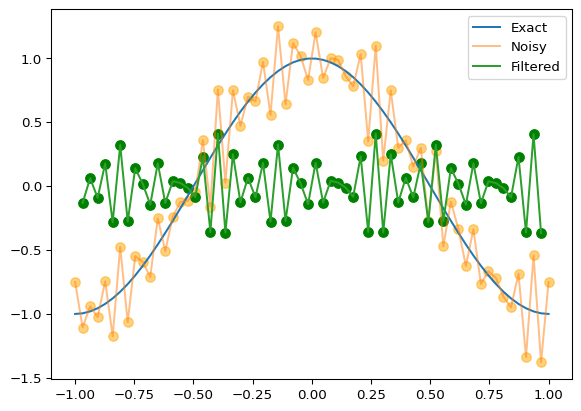

In [5]:
y = np.zeros_like(x)
for k in range(1, 63):
    y[k] = -1/4*g(x[k+1]) + 1/2*g(x[k]) - 1/4*g(x[k-1])
plt.plot(x, f(x), label='Exact')
plt.plot(x, g(x), label='Noisy', alpha=0.5)
plt.scatter(x, g(x), color='orange', s=50, alpha=0.5)  # Add dots for 'Noisy'
plt.plot(x[1:-1], y[1:-1], label='Filtered')
plt.scatter(x[1:-1], y[1:-1], color='green', s=50)  # Add dots for 'Filtered'
plt.legend()

. . .

This is a *high-pass filter*. It captures the high-frequency noise, but
filters out the low-frequency signal.

# *Inverse Matrices*

## *Definition of inverse matrix*

Let $A$ be a square matrix.

*Inverse* for $A$ is a square matrix $B$ of the same size as $A$

-   such that $A B=I=B A$.

-   

-   If such a $B$ exists, then the matrix $A$ is said to be
    **invertible**.

-   Also called **“singular”** (non-invertible), or **“nonsingular”**
    (invertible)

## *Conditions for invertibility*

Conditions for Invertibility The following are equivalent conditions on
the square $n \times n$ matrix $A$ :

1.  The matrix $A$ is invertible.

2.  There is a square matrix $B$ such that $B A=I$.

3.  The linear system $A \mathbf{x}=\mathbf{b}$ has a unique solution
    for every right-hand-side vector $\mathbf{b}$.

4.  The linear system $A \mathbf{x}=\mathbf{b}$ has a unique solution
    for some right-hand-side vector $\mathbf{b}$.

5.  The linear system $A \mathbf{x}=0$ has only the trivial solution.

6.  $\operatorname{rank} A=n$.

7.  The reduced row echelon form of $A$ is $I_{n}$.

8.  The matrix $A$ is a product of elementary matrices.

9.  There is a square matrix $B$ such that $A B=I$.

## *Elementary matrices*

-   Each of the operations in row reduction can be represented by a
    matrix $E$.

. . .

Remember: - $E_{i j}$ : The elementary operation of switching the ith
and jth rows of the matrix. - $E_{i}(c)$ : The elementary operation of
multiplying the ith row by the nonzero constant $c$. - $E_{i j}(d)$ :
The elementary operation of adding $d$ times the jth row to the ith row.

. . .

Find an **elementary matrix** of size $n$ is by performing the
corresponding elementary row operation on the identity matrix $I_{n}$.

. . .

Example: Find the elementary matrix for $E_{13}(-4)$

. . .

Add -4 times the 3rd row of $I_{3}$ to its first row…

. . .

$$
E_{13}(-4)=\left[\begin{array}{rrr}
1 & 0 & -4 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right]
$$

## 

Recall an example from the first week:

Solve the simple system

$$
\begin{gather*}
2 x-y=1 \\
4 x+4 y=20 . \tag{1.5}
\end{gather*}
$$

. . .

$$
\begin{aligned}
& {\left[\begin{array}{rrr}
2 & -1 & 1 \\
4 & 4 & 20
\end{array}\right] \overrightarrow{E_{12}}\left[\begin{array}{rrr}
4 & 4 & 20 \\
2 & -1 & 1
\end{array}\right] \overrightarrow{E_{1}(1 / 4)}\left[\begin{array}{rrr}
1 & 1 & 5 \\
2 & -1 & 1
\end{array}\right]} \\
& \overrightarrow{E_{21}(-2)}\left[\begin{array}{rrr}
1 & 1 & 5 \\
0 & -3 & -9
\end{array}\right] \overrightarrow{E_{2}(-1 / 3)}\left[\begin{array}{lll}
1 & 1 & 5 \\
0 & 1 & 3
\end{array}\right] \overrightarrow{E_{12}(-1)}\left[\begin{array}{lll}
1 & 0 & 2 \\
0 & 1 & 3
\end{array}\right] .
\end{aligned}
$$

## 

Rewrite this using matrix multiplication: $$
\left[\begin{array}{lll}
1 & 0 & 2 \\
0 & 1 & 3
\end{array}\right]=E_{12}(-1) E_{2}(-1 / 3) E_{21}(-2) E_{1}(1 / 4) E_{12}\left[\begin{array}{rrr}
2 & -1 & 1 \\
4 & 4 & 20
\end{array}\right] \text {. }
$$

## 

Remove the last columns in each matrix above. (They were the “augmented”
part of the original problem.) All the operations still work:

$$
\left[\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right]=E_{12}(-1) E_{2}(-1 / 3) E_{21}(-2) E_{1}(1 / 4) E_{12}\left[\begin{array}{rr}
2 & -1 \\
4 & 4
\end{array}\right] \text {. }
$$

. . .

Aha! We now have a formula for the inverse of the original matrix:

$$
A^{-1}=E_{12}(-1) E_{2}(-1 / 3) E_{21}(-2) E_{1}(1 / 4) E_{12}
$$

## *Superaugmented matrix*

-   Form the **superaugmented matrix** $[A \mid I]$.

-   If we perform the elementary operation $E$ on the superaugmented
    matrix, we get the matrix $E$ in the augmented part:

$$
E[A \mid I]=[E A \mid E I]=[E A \mid E]
$$

-   This can help us keep track of our operations as we do row reduction

-   The augmented part is just the product of the elementary matrices
    that we have used so far.

-   Now continue applying elementary row operations until the part of
    the matrix originally occupied by $A$ is reduced to the reduced row
    echelon form of $A$. . . . $$
    [A \mid I] \overrightarrow{E_{1}, E_{2}, \ldots, E_{k}}[I \mid B]
    $$

-   $B=E_{k} E_{k-1} \cdots E_{1}$ is the product of the various
    elementary matrices we used.

## *Inverse Algorithm*

Given an $n \times n$ matrix $A$, to compute $A^{-1}$ :

1.  Form the superaugmented matrix
    $\widetilde{A}=\left[A \mid I_{n}\right]$.

2.  Reduce the first $n$ columns of $\tilde{A}$ to reduced row echelon
    form by performing elementary operations on the matrix
    $\widetilde{A}$ resulting in the matrix $[R \mid B]$.

3.  If $R=I_{n}$ then set $A^{-1}=B$; otherwise, $A$ is singular and
    $A^{-1}$ does not exist.

## *2x2 matrices*

Suppose we have the 2x2 matrix

$$
A=\left[\begin{array}{ll}
a & b \\
c & d
\end{array}\right]
$$

. . .

Do row reduction on the superaugmented matrix:

$$
\left[\begin{array}{ll|ll}
a & b & 1 & 0 \\
c & d & 0 & 1
\end{array}\right]
$$

. . .

``` {pyodide-python}
import sympy as sym
a, b, c, d = sym.symbols('a b c d')
A = sym.Matrix([[a, b], [c, d]])
augmented = A.row_join(sym.eye(2))
reduced = augmented.rref()
reduced 
```

## 

$$
A^{-1}=\frac{1}{D}\left[\begin{array}{rr}
d & -b \\
-c & a
\end{array}\right]
$$

# *PageRank revisited*

## *Back to PageRank*

![](https://cdn.mathpix.com/cropped/2024_02_16_adbe27593182d62240abg-140.jpg?height=196&width=938&top_left_y=198&top_left_x=286)

Do page ranking as in the first week:

-   for page $j$ let $n_{j}$ be its total number of outgoing links on
    that page.
-   Then the score for vertex $i$ is the sum of the scores of all
    vertices $j$ that link to $i$, divided by the total number of
    outgoing links on page $j$. . . . $$
    \begin{equation*}
    x_{i}=\sum_{x_{j} \in L_{i}} \frac{x_{j}}{n_{j}} . \tag{1.4}
    \end{equation*}
    $$

. . .

$$
\begin{aligned}
& x_{1}=\frac{x_{3}}{3} \\
& x_{2}=\frac{x_{1}}{2}+\frac{x_{3}}{3} \\
& x_{3}=\frac{x_{1}}{2}+\frac{x_{2}}{1} \\
& x_{4}=\frac{x_{3}}{3} \\
& x_{5}=\frac{x_{6}}{1} \\
& x_{6}=\frac{x_{5}}{1}
\end{aligned}
$$

## *PageRank as a matrix equation*

Define the matrix $Q$ and vector $\mathbf{x}$ by

$$
Q=\left[\begin{array}{llllll}
0 & 0 & \frac{1}{3} & 0 & 0 & 0 \\
\frac{1}{2} & 0 & \frac{1}{3} & 0 & 0 & 0 \\
\frac{1}{2} & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & \frac{1}{3} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0
\end{array}\right], \mathbf{x}=\left(x_{1}, x_{2}, x_{3}, x_{4}, x_{5}\right)
$$

. . .

Then the equation $x=Q x$ is equivalent to the system of equations
above.

. . .

$\mathbf{x}$ is a **stationary vector** for the transition matrix $Q$.

## *Connection between adjacency matrix and transition matrix*

-   $A$: adjacency matrix of a graph or digraph
-   $D$: be a diagonal matrix whose $i$ th entry is either:
    -   the inverse of the sum of all entries in the $i$ th row of
        $\mathrm{A}$, or
    -   zero if if this sum is zero.
-   Then $Q=A^{T} D$ is the transition matrix for the page ranking of
    this graph.

. . . Check:

$$
A=\left[\begin{array}{llllll}
0 & 1 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0
\end{array}\right]
$$

``` {pyodide-python}
import sympy as sym
A = sym.Matrix([[0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0]])
D = sym.diag(sym.Rational(1,3), sym.Rational(1,2), sym.Rational(1,3), 0, 1, 1)
Q = A.T*D
Q
```

## *PageRank as a Markov chain*

Think of web surfing as a **random process**

-   each page is a state
-   
-   probabilities of moving from one state to another given by a
    stochastic transition matrix P.
-   
-   equal probability of moving to any of the outgoing links of a page

. . .

$$
P\stackrel{?}{=}\left[\begin{array}{llllll}
0 & 0 & \frac{1}{3} & 0 & 0 & 0 \\
\frac{1}{2} & 0 & \frac{1}{3} & 0 & 0 & 0 \\
\frac{1}{2} & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & \frac{1}{3} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0
\end{array}\right]
$$

**Pause**: Is $P$ a stochastic matrix?

## *Correction vector*

We can introduce a *correction vector*, equivalent to adding links from
the dangling node to every other node, or to all connecting nodes (via
some path).

. . .

$$
P=\left[\begin{array}{llllll}
0 & 0 & \frac{1}{3} & \frac{1}{3} & 0 & 0 \\
\frac{1}{2} & 0 & \frac{1}{3} & \frac{1}{3} & 0 & 0 \\
\frac{1}{2} & 1 & 0 & \frac{1}{3} & 0 & 0 \\
0 & 0 & \frac{1}{3} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0
\end{array}\right]
$$

. . .

This is now a stochastic matrix **“surfing matrix”**

. . .

Find the new transition matrix $Q$…

``` {pyodide-python}
A = sym.Matrix([[0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0]])
D = sym.diag(sym.Rational(1,3), sym.Rational(1,2), sym.Rational(1,3), 0, 1, 1)
Q = A.T*D
Q
```

## *Teleportation*

![](https://cdn.mathpix.com/cropped/2024_02_16_adbe27593182d62240abg-140.jpg?height=196&width=938&top_left_y=198&top_left_x=286)

There may not be a single stationary vector for the surfing matrix $P$.

. . .

Solution: Jump around. Every so often, instead of following a link, jump
to a *random page*.

. . .

How can we modify the surfing matrix to include this?

Introduce a **teleportation matrix** $E$, which is a transition matrix
that allows the surfer to jump to any page with equal probability.

**Pause**: What must $E$ be?

. . .

-   Let $\mathbf{v}$ be the teleportation vector with entries 1/n -Let
    $\mathbf{e}=$ $(1,1, \ldots, 1)$ be the vector of all ones.
-   Then $\mathbf{v e}^{T}$ is a stochastic matrix whose columns are all
    equal to $\mathbf{v}$. This is $E$.

## *PageRank Matrix*

Let:

-   $P$ be a stochastic matrix,
-   $\mathbf{v}$ a distribution vector of compatible size
-   $\alpha$ a teleportation parameter with $0<\alpha<1$.
-   Then $\alpha P+(1-\alpha) \mathbf{v e}^{T}$ and
-   . . . our goal is to find stationary vectors $$
    \begin{equation*}
    \left(\alpha P+(1-\alpha) \mathbf{v e}^{T}\right) \mathbf{x}=\mathbf{x} \tag{2.4}
    \end{equation*}
    $$

. . .

Rearranging,

$$
\begin{equation*}
(I-\alpha P) \mathbf{x}=(1-\alpha) \mathbf{v} \tag{2.5}
\end{equation*}
$$

## *Now solve pagerank for our example*

Use `M.solve(b)`…

``` {pyodide-python}
A = sym.Matrix([[0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0]])
D = sym.diag(sym.Rational(1,3), sym.Rational(1,2), sym.Rational(1,3), 0, 1, 1)
Q = A.T*D
Q
```